In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('normalized_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Columns: 686 entries, Title to Efficiency in %
dtypes: float64(684), object(2)
memory usage: 166.3+ KB


In [4]:
# Replace NaN values with the median for numeric columns only
ncol = df.select_dtypes(include=['float64','int64']).columns
df[ncol] = df[ncol].fillna(df[ncol].median())
df.head(15)

,Title,r_j_SCF_Energy_Hartree,r_j_Gas_Phase_Energy_Hartree,r_j_One_Electron_Energy_Hartree,r_j_Two-electron_Energy_Hartree,r_j_Total_Electronic_Energy_Hartree,r_j_Nuclear_Repulsion_Energy_Hartree,r_j_Alpha_HOMO_Energy_Hartree,r_j_Beta_HOMO_Energy_Hartree,r_j_Alpha_LUMO_Energy_Hartree,...,r_qp_PSA,i_qp_#NandO,i_qp_RuleOfFive,i_qp_RuleOfThree,i_qp_#ringatoms,i_qp_#in34,i_qp_#in56,i_qp_#noncon,i_qp_#nonHatm,Efficiency in %
0,H02,0.721267,0.721267,0.609212,0.421452,0.628942,0.424676,0.673355,0.673355,0.639610,...,0.636821,0.4,0.0,0.0,0.35,0.0,0.35,0.0,0.458333,0.700375
1,H04,0.953817,0.953817,0.921560,0.086407,0.926687,0.093915,0.373615,0.373615,0.378246,...,0.828640,0.4,0.0,1.0,0.05,0.0,0.05,0.0,0.125000,0.928839
2,H06,0.161868,0.161868,0.426689,0.507842,0.384567,0.281201,0.644812,0.644812,0.623672,...,0.276780,0.2,0.0,0.0,0.05,0.0,0.05,0.0,0.208333,0.895131
3,H08,0.149969,0.149969,0.417338,0.516224,0.374593,0.287654,0.698140,0.698140,0.621555,...,0.257465,0.2,0.0,0.0,0.05,0.0,0.05,0.0,0.250000,0.913858
4,H09,0.000000,0.000000,0.000000,1.000000,0.000000,0.864346,0.513441,0.513441,0.426282,...,0.377493,0.4,1.0,1.0,0.80,0.0,0.80,0.0,0.791667,0.928839
5,H11,0.912819,0.912819,0.839758,0.178322,0.851391,0.197614,0.368653,0.368653,0.397778,...,0.514300,0.4,0.0,0.0,0.30,0.0,0.30,1.0,0.250000,0.728464
6,H12,0.918822,0.918822,0.846267,0.171549,0.857730,0.191758,0.372627,0.372627,0.397139,...,0.584111,0.4,0.0,0.0,0.30,0.0,0.30,1.0,0.250000,0.898502
7,H13,0.876389,0.876389,0.749412,0.282395,0.769877,0.318833,0.439830,0.439830,0.451700,...,0.315455,0.4,0.0,0.0,0.05,0.0,0.05,0.0,0.375000,0.805243
8,H14,0.882795,0.882795,0.776981,0.251672,0.795417,0.275213,0.763224,0.763224,0.620012,...,0.277910,0.2,0.0,0.0,0.35,0.0,0.35,0.0,0.375000,0.823970
9,H15,0.929950,0.929950,0.870823,0.141681,0.878869,0.162215,0.135779,0.135779,0.194348,...,0.800202,0.4,0.0,0.0,0.05,0.0,0.05,0.0,0.208333,1.000000


In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

In [6]:
correlation_with_target = numerical_columns.corr()['Efficiency in %'].sort_values(ascending=False)

# Display the top 10 features with the highest correlation with the target
correlation_with_target.head(10)

Efficiency in %                                    1.000000
r_desc_Kier_flexibility                            0.475905
r_desc_3-path_Kier_alpha-modified_shape_index      0.462779
r_desc_Radial_centric                              0.461865
r_desc_Mean_topological_charge_index_of_order_7    0.445212
r_desc_2-path_Kier_alpha-modified_shape_index      0.408928
r_desc_Petitjean_2D_shape                          0.407788
i_canvas_RB                                        0.390326
r_desc_ALOGP5                                      0.370485
r_desc_Average_eccentricity                        0.356453
Name: Efficiency in %, dtype: float64

In [7]:
top_10_features = correlation_with_target.head(10).index

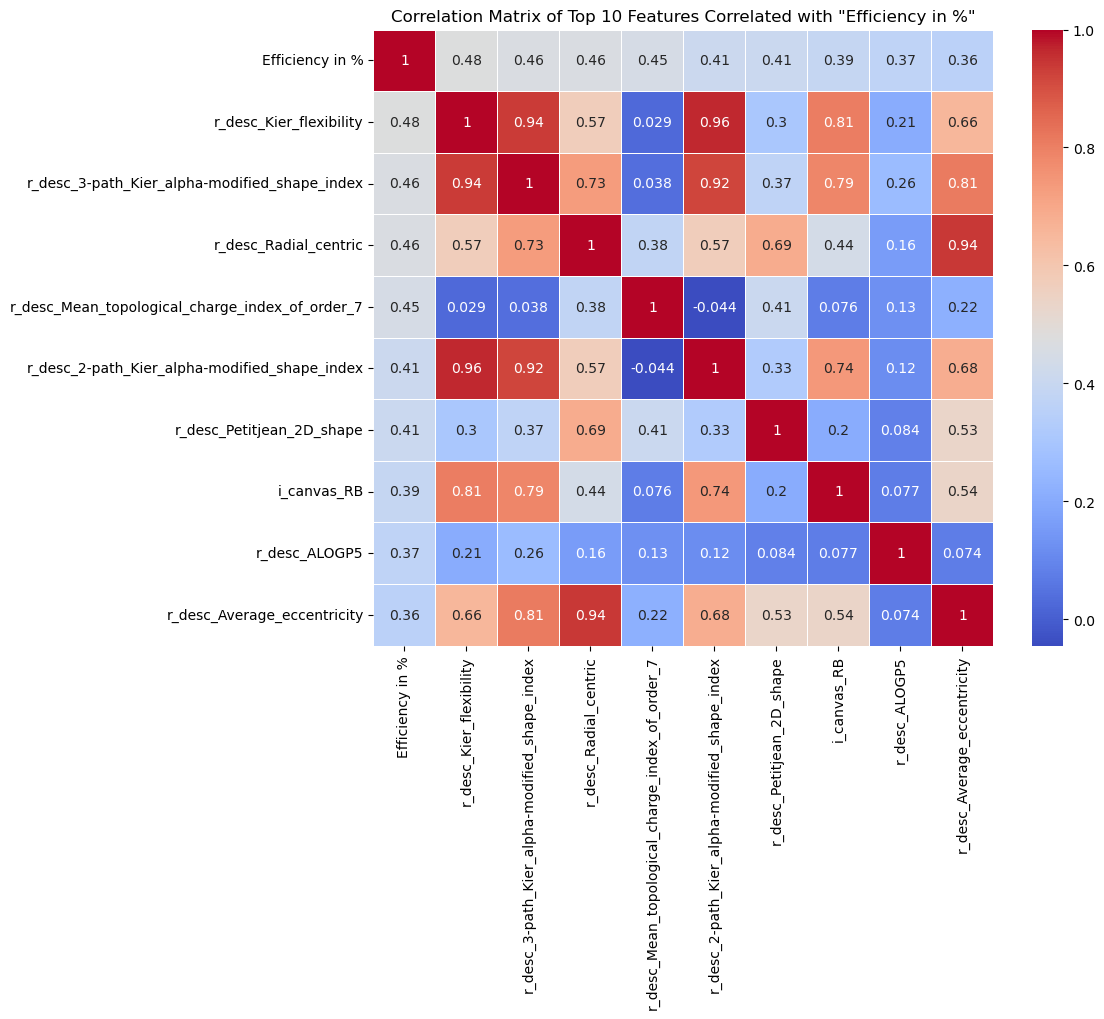

In [8]:
# Filter the correlation matrix for the top 10 correlated features
top_10_corr_matrix = correlation_matrix.loc[top_10_features, top_10_features]

# Plot the correlation matrix of the top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top 10 Features Correlated with "Efficiency in %"')
plt.savefig('top_10_correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

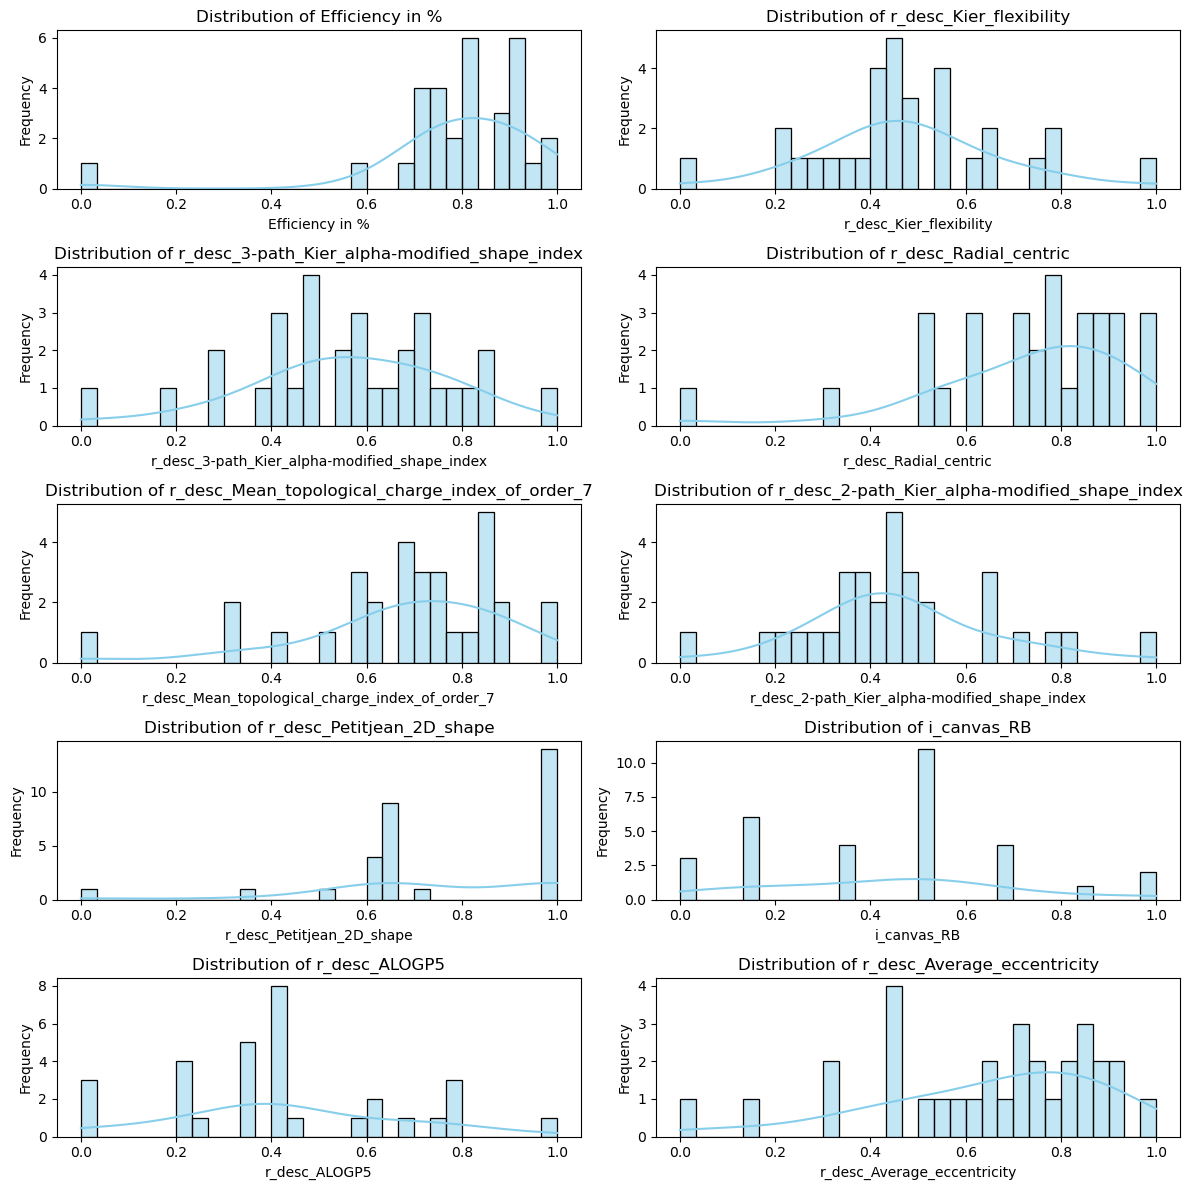

In [9]:
# Assuming 'correlation_with_target' contains the top 10 features correlated with the target
top_10_features = correlation_with_target.head(10).index

# Plotting the distribution of the top 10 features
plt.figure(figsize=(12, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)  # Create subplots with 5 rows and 2 columns
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('top_10_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\2007300904.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'log_{feature}'] = np.log1p(df[feature])  # np.log1p is used to avoid log(0)
C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\2007300904.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'log_{feature}'] = np.log1p(df[feature])  # np.log1p is used to avoid log(0)
C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\2007300904.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

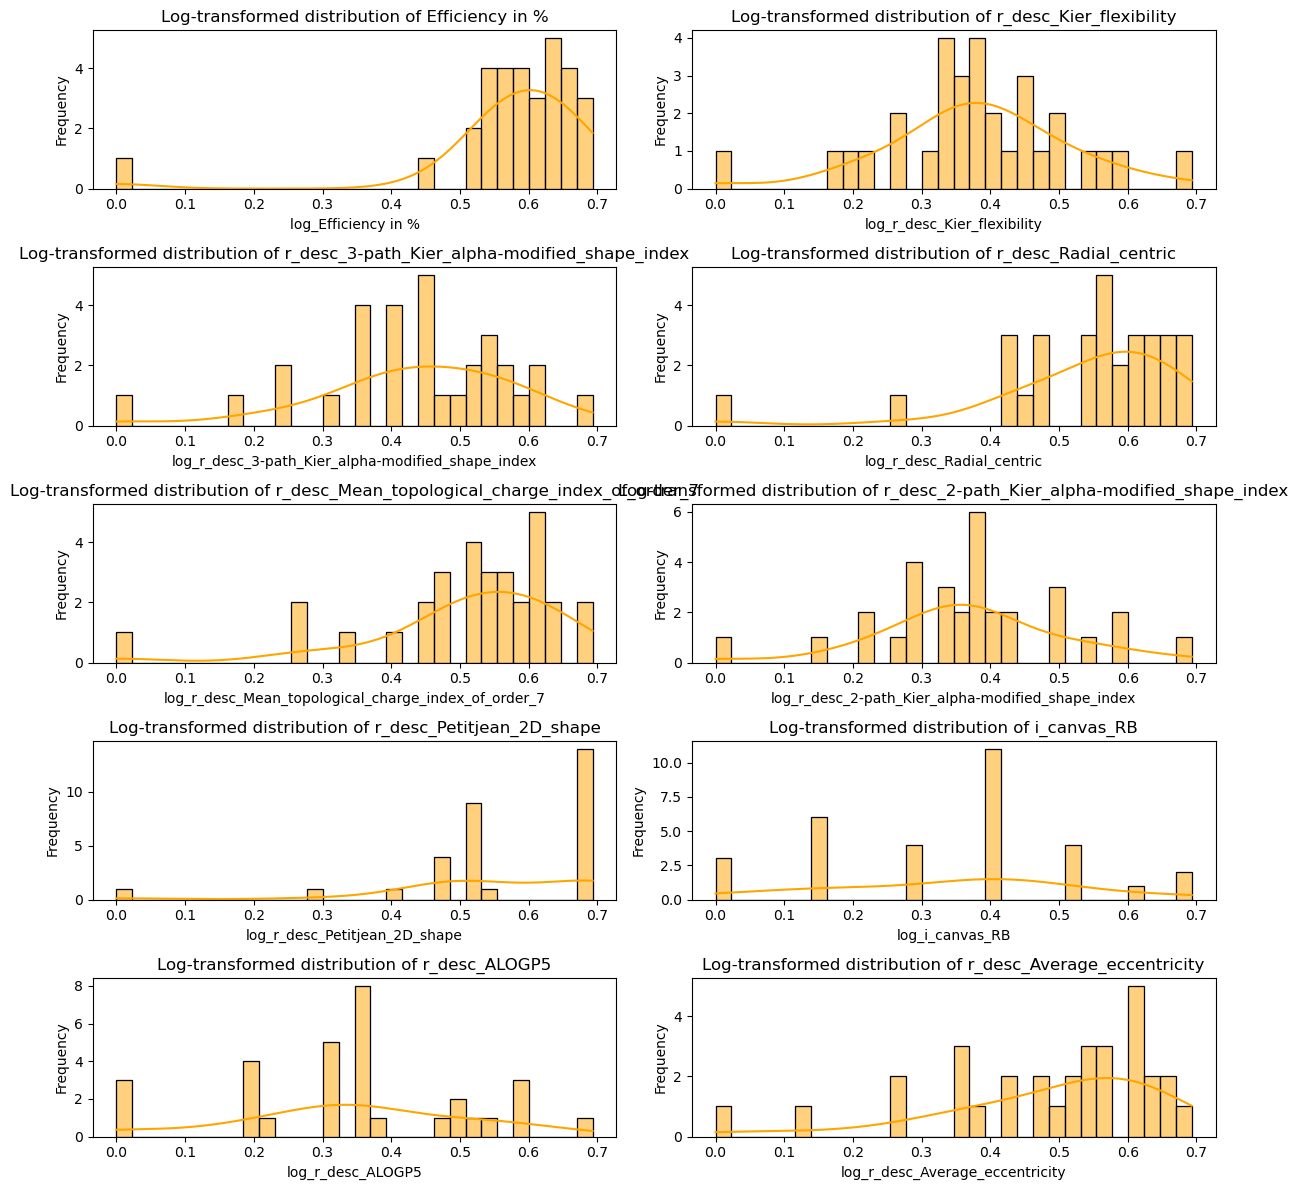

In [10]:
import numpy as np

# Apply log transformation to skewed features
for feature in top_10_features:
    df[f'log_{feature}'] = np.log1p(df[feature])  # np.log1p is used to avoid log(0)

# Visualize the transformed data
plt.figure(figsize=(12, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[f'log_{feature}'], kde=True, bins=30, color='orange')
    plt.title(f'Log-transformed distribution of {feature}')
    plt.xlabel(f'log_{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_transformed_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\873399427.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'sqrt_{feature}'] = np.sqrt(df[feature])
C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\873399427.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'sqrt_{feature}'] = np.sqrt(df[feature])
C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_12448\873399427.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

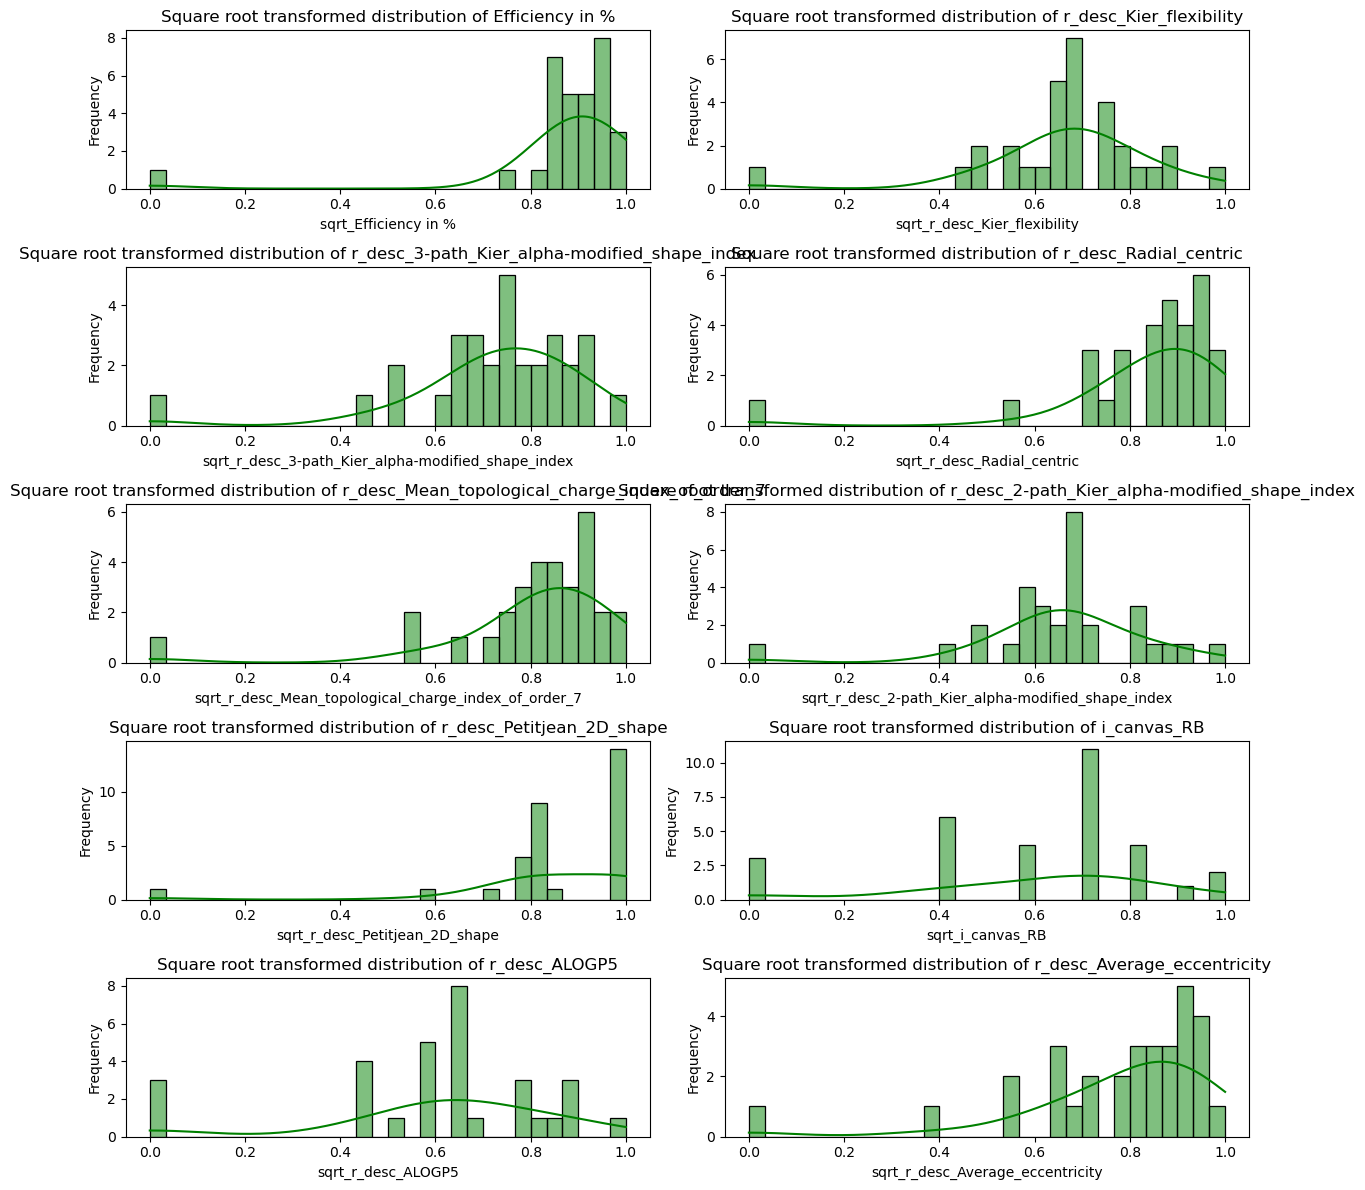

In [11]:
# Apply square root transformation to skewed features
for feature in top_10_features:
    df[f'sqrt_{feature}'] = np.sqrt(df[feature])

# Visualize the transformed data
plt.figure(figsize=(12, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[f'sqrt_{feature}'], kde=True, bins=30, color='green')
    plt.title(f'Square root transformed distribution of {feature}')
    plt.xlabel(f'sqrt_{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('sqrt_transformed_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Generate more detailed descriptions for better model training
for index, row in df_sqrt.iterrows():
    description = f"""
    Molecule {index + 1}:
    This molecule demonstrates a corrosion inhibition efficiency of {row['sqrt_Efficiency in %']:.10f} percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments 
    The molecule exhibits a Kier flexibility value of {row['sqrt_r_desc_Kier_flexibility']:.10f} suggesting 
    a relatively adaptable structure that could affect its ability to fit into complex molecular configurations

    The 3-path Kier alpha-modified shape index is measured at {row['sqrt_r_desc_3-path_Kier_alpha-modified_shape_index']:.10f} 
    reflecting the structural modifications made to enhance its stability. Additionally it has a radial centric 
    value of {row['sqrt_r_desc_Radial_centric']:.10f} which measures the centrality of its atomic distribution 
    often linked to molecule symmetry and its interactions in polar environments

    This molecule features a mean topological charge index of {row['sqrt_r_desc_Mean_topological_charge_index_of_order_7']:.10f} 
    for the 7th order indicating how its charge is distributed over its surface potentially influencing its 
    electron-withdrawing or donating properties during reactions

    Furthermore the 2-path Kier alpha-modified shape index is {row['sqrt_r_desc_2-path_Kier_alpha-modified_shape_index']:.10f} 
    providing additional insight into the complexity of its bond structure The Petitjean 2D shape value of 
    {row['sqrt_r_desc_Petitjean_2D_shape']:.10f} indicates its geometric compactness influencing the molecule’s 
    behavior in solvent environments

    This molecule also contains {row['sqrt_i_canvas_RB']:.10f} rotatable bonds signifying its degree of flexibility 
    for conformational changes which may be crucial in determining its interaction with surfaces or biological targets

    The ALOGP5 value of {row['sqrt_r_desc_ALOGP5']:.10f} suggests that this molecule has a certain level of lipophilicity 
    influencing its solubility in organic solvents and membrane permeability which could be important for industrial 
    applications or drug formulation

    Finally the average eccentricity of {row['sqrt_r_desc_Average_eccentricity']:.10f} provides insights into its atomic 
    distribution with potential implications for its reactivity diffusion and other dynamic properties
    ----------------------------------------
    """
    print(description)



    Molecule 1:
    This molecule demonstrates a corrosion inhibition efficiency of 0.8368838222 percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments 
    The molecule exhibits a Kier flexibility value of 0.6986506904 suggesting 
    a relatively adaptable structure that could affect its ability to fit into complex molecular configurations

    The 3-path Kier alpha-modified shape index is measured at 0.7048173397 
    reflecting the structural modifications made to enhance its stability. Additionally it has a radial centric 
    value of 0.7265105128 which measures the centrality of its atomic distribution 
    often linked to molecule symmetry and its interactions in polar environments

    This molecule features a mean topological charge index of 1.0000000000 
    for the 7th order indicating how its charge is distributed over its surface potentially influencing its 
    electron-withdrawing or donating properties during reac

In [12]:
import pandas as pd

def generate_text_descriptions(df):
    """
    Generates textual descriptions for molecules based on the top correlated features.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing molecule data.

    Returns:
    list: A list of text descriptions for each molecule.
    """
    descriptions = []

    # Iterate through each molecule (row) in the DataFrame
    for index, row in df.iterrows():
        description = []
        
        # Create natural language sentences for each top feature
        description.append(f"The molecule has an efficiency of {row['Efficiency in %']} percent.")
        description.append(f"It shows a Kier flexibility value of {row['r_desc_Kier_flexibility']}.")
        description.append(f"The 3-path Kier alpha-modified shape index is {row['r_desc_3-path_Kier_alpha-modified_shape_index']}.")
        description.append(f"It has a radial centric value of {row['r_desc_Radial_centric']}.")
        description.append(f"The mean topological charge index of order 7 is {row['r_desc_Mean_topological_charge_index_of_order_7']}.")
        description.append(f"The 2-path Kier alpha-modified shape index is {row['r_desc_2-path_Kier_alpha-modified_shape_index']}.")
        description.append(f"It has a Petitjean 2D shape value of {row['r_desc_Petitjean_2D_shape']}.")
        description.append(f"There are {row['i_canvas_RB']} rotatable bonds in the molecule.")
        description.append(f"The ALOGP5 value, representing the lipophilicity, is {row['r_desc_ALOGP5']}.")
        description.append(f"The molecule has an average eccentricity of {row['r_desc_Average_eccentricity']}.")

        # Join the sentences into a single description
        descriptions.append(" ".join(description))

    return descriptions

In [13]:
# Generate descriptions and add them as a new column in the DataFrame
df['description'] = generate_text_descriptions(df)

C:\Users\OUAZZE\AppData\Local\Temp\ipykernel_9572\1919689250.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['description'] = generate_text_descriptions(df)


In [14]:
for i, desc in enumerate(df['description']):
    print(f"Molecule {i+1}:\n{desc}\n{'-'*40}")

Molecule 1:
The molecule has an efficiency of 0.7003745318352061 percent. It shows a Kier flexibility value of 0.4881127871617637. The 3-path Kier alpha-modified shape index is 0.4967674823833766. It has a radial centric value of 0.5278175252507278. The mean topological charge index of order 7 is 1.0. The 2-path Kier alpha-modified shape index is 0.4520029444914506. It has a Petitjean 2D shape value of 0.6000000000000001. There are 0.3333333333333333 rotatable bonds in the molecule. The ALOGP5 value, representing the lipophilicity, is 0.7405282890373805. The molecule has an average eccentricity of 0.449152542846883.
----------------------------------------
Molecule 2:
The molecule has an efficiency of 0.9288389513108616 percent. It shows a Kier flexibility value of 0.2008052075154037. The 3-path Kier alpha-modified shape index is 0.1890096606577855. It has a radial centric value of 0.3118835805268793. The mean topological charge index of order 7 is 0.8110599105251755. The 2-path Kier a

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
from datasets import Dataset
from transformers import Trainer, TrainingArguments

In [54]:
train_texts, test_texts = train_test_split(df['description'].tolist(), test_size=0.2, random_state=42)
train_texts, val_texts = train_test_split(train_texts, test_size=0.125, random_state=42)  # 10% validation

In [55]:
# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [56]:
tokenizer.pad_token = tokenizer.eos_token

In [57]:
train_inputs = tokenizer(train_texts, return_tensors='pt', padding=True, truncation=True)
val_inputs = tokenizer(val_texts, return_tensors='pt', padding=True, truncation=True)
test_inputs = tokenizer(test_texts, return_tensors='pt', padding=True, truncation=True)

In [58]:
train_dataset = Dataset.from_dict({
    'input_ids': train_inputs['input_ids'].tolist(),
    'attention_mask': train_inputs['attention_mask'].tolist(),
    'labels': train_inputs['input_ids'].tolist()
})

In [59]:
val_dataset = Dataset.from_dict({
    'input_ids': val_inputs['input_ids'].tolist(),
    'attention_mask': val_inputs['attention_mask'].tolist(),
    'labels': val_inputs['input_ids'].tolist()
})

In [60]:
training_args = TrainingArguments(
    output_dir='../1/res2',             
    per_device_train_batch_size=3,       
    num_train_epochs=80,                   
    logging_dir='../1/log2',                
    logging_steps=2,                     
    eval_strategy="epoch",          
    save_strategy="epoch",               
)

In [61]:
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,        
    eval_dataset=val_dataset             
)

In [62]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,3.307300,2.818612
2,2.179600,2.029298
3,1.749600,1.826401
4,1.379700,1.797716
5,1.464100,1.801286
6,1.509900,1.815423
7,1.214200,1.812513
8,1.363200,1.876584
9,1.364900,1.863525
10,1.188700,1.847563


TrainOutput(global_step=560, training_loss=0.47807880311406087, metrics={'train_runtime': 4821.8215, 'train_samples_per_second': 0.348, 'train_steps_per_second': 0.116, 'total_flos': 162041886720000.0, 'train_loss': 0.47807880311406087, 'epoch': 80.0})

In [63]:
test_dataset = Dataset.from_dict({
    'input_ids': test_inputs['input_ids'].tolist(),
    'attention_mask': test_inputs['attention_mask'].tolist(),
    'labels': test_inputs['input_ids'].tolist()
})

In [64]:
trainer.evaluate(test_dataset)

InvalidArgumentError: Failed to create a directory: ../1/log2; Invalid argument

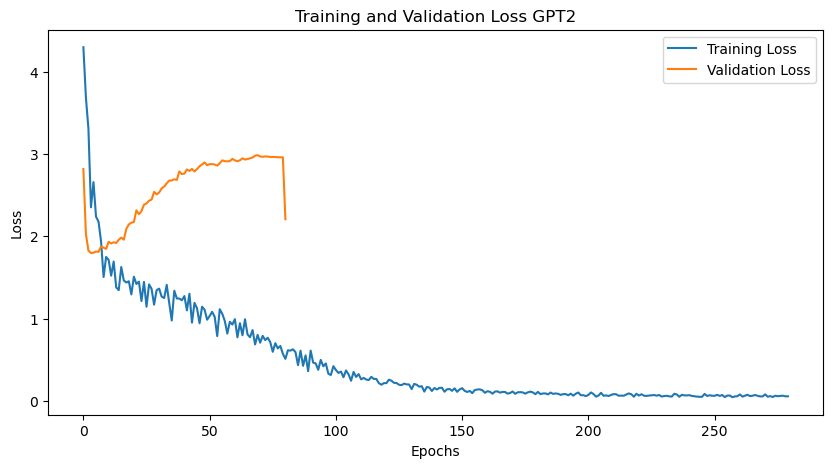

In [65]:
import matplotlib.pyplot as plt

train_loss = []
val_loss = []


for log in trainer.state.log_history:
    if 'loss' in log.keys():
        train_loss.append(log['loss'])
    if 'eval_loss' in log.keys():
        val_loss.append(log['eval_loss'])


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GPT2')
plt.legend()
plt.show()

In [66]:
test_results = trainer.evaluate(test_dataset)
test_loss = test_results['eval_loss']
print(f"Test Loss: {test_loss}")

InvalidArgumentError: Failed to create a directory: ../1/log2; Invalid argument

In [67]:
# Generate predictions
predicted_outputs = trainer.predict(test_dataset)
predicted_ids = predicted_outputs.predictions.argmax(-1)  # Get the predicted token ids

# Decode the predicted and actual outputs back into text for comparison
predicted_texts = [tokenizer.decode(pred, skip_special_tokens=True) for pred in predicted_ids]
actual_texts = [tokenizer.decode(label, skip_special_tokens=True) for label in test_dataset['labels']]

In [68]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred_ids, true_ids):
    flattened_pred = [token for pred in pred_ids for token in pred]
    flattened_true = [token for true in true_ids for token in true]
    
    accuracy = accuracy_score(flattened_true, flattened_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(flattened_true, flattened_pred, average='macro')
    
    return accuracy, precision, recall, f1

# Calculate metrics
accuracy, precision, recall, f1 = compute_metrics(predicted_ids.tolist(), test_dataset['labels'])
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.0257
Precision: 0.0036
Recall: 0.0052
F1-Score: 0.0041


C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
for i in range(5):  # Adjust range as needed
    print(f"Sample {i + 1}")
    print(f"Actual Text: {actual_texts[i]}")
    print(f"Predicted Text: {predicted_texts[i]}")
    print("\n")

actual_lengths = [len(a) for a in actual_texts]
predicted_lengths = [len(p) for p in predicted_texts]

Sample 1
Actual Text: The molecule has an efficiency of 0.7041198501872659 percent. It shows a Kier flexibility value of 0.3105117156314013. The 3-path Kier alpha-modified shape index is 0.3808657763685223. It has a radial centric value of 0.730950876641963. The mean topological charge index of order 7 is 0.5913975229453696. The 2-path Kier alpha-modified shape index is 0.2942583695512875. It has a Petitjean 2D shape value of 1.0. There are 0.0 rotatable bonds in the molecule. The ALOGP5 value, representing the lipophilicity, is 0.2104694905990832. The molecule has an average eccentricity of 0.5310734469702192.
Predicted Text:  molecule has an efficiency of 0.847124722826212176. It shows a Kier flexibility value of 0.4712828184999884. The 3-path Kier alpha-modified shape index is 0.425836978401718. It has a radial centric value of 0.600696692675176. The mean topological charge index of order 7 is 0.67325878353768021 The 2-path Kier alpha-modified shape index is 0.346427056625441 It has

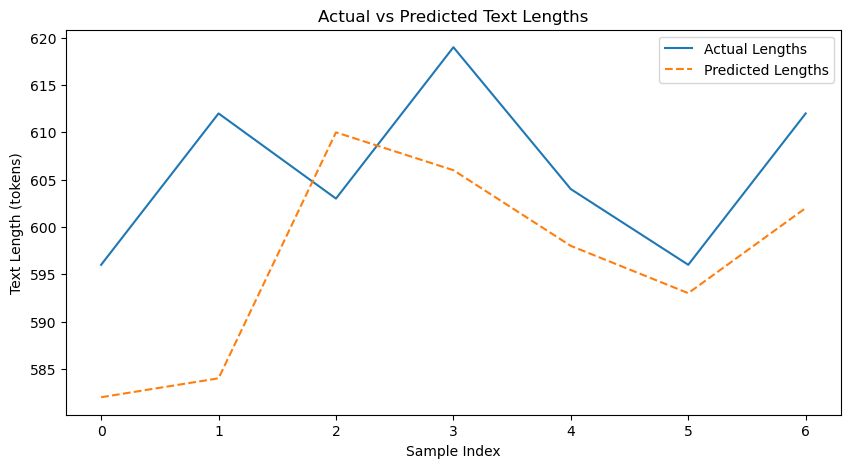

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(actual_lengths, label="Actual Lengths")
plt.plot(predicted_lengths, label="Predicted Lengths", linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Text Length (tokens)")
plt.legend()
plt.title("Actual vs Predicted Text Lengths")
plt.show()